In [1]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis
from eis.scoring import circuit_CV_optimized_score

from os import path

In [2]:
# loading training data

# if you are on a windows machine un-comment the following line to get the path to training data
# here = !echo %cd%

# if you are on a mac/ unix machine un-comment the following line to get the path to training data
here = !pwd

train_data_path = path.join(path.dirname(here[0]), "train_data.csv")
eis_data = eis_dataframe_from_csv(train_data_path)

perfect circuit guess cv score: 4.129182315049145e-06


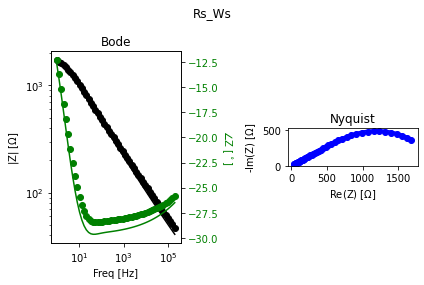

R1: 4.73e+00, W1_R: 2.08e+03, W1_T: 9.87e-01, W1_p: 2.08e+00


In [3]:
# Try scoring model w/ perfect initial guesses using cross validation
sample = eis_data.loc[eis_data.Circuit == "Rs_Ws"].iloc[0,:]
frequencies = sample.freq
impedances = sample.Z
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
print(f"perfect circuit guess cv score: {circuit_CV_optimized_score(circuit, frequencies, impedances)}")
plot_eis(sample.freq, sample.Z, ECM=circuit, title=sample.Circuit)
print(sample.Parameters)

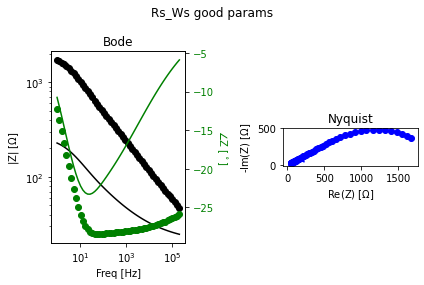

good circuit guess cv score: 4.129145259762919e-06


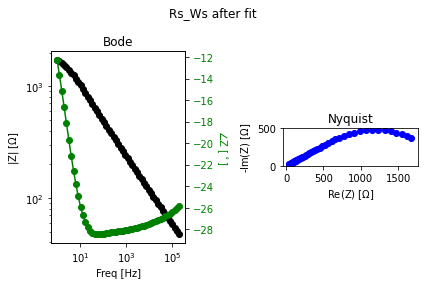

[('R1', 4.726107521213226), ('W1_R', 2080.2776217601954), ('W1_T', 0.9869448108746668), ('W1_p', 1.9991403679018718)]


In [4]:
# Try scoring model w/ good initial guesses
sample = eis_data.loc[eis_data.Circuit == "Rs_Ws"].iloc[0,:]
frequencies = sample.freq
impedances = sample.Z
good_params = "R1:20,W1_R:250,W1_T:0.9,W1_p:2"
circuit = ECM_from_raw_strings(sample.Circuit, good_params)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " good params")
print(f"good circuit guess cv score: {circuit_CV_optimized_score(circuit, frequencies, impedances)}")
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])

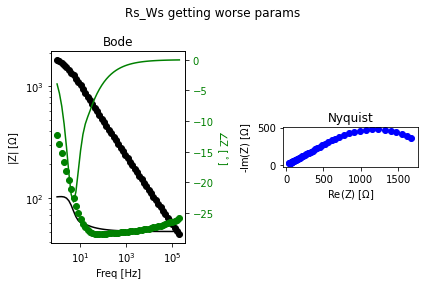

getting worse circuit guess cv score: 476.54233001575534


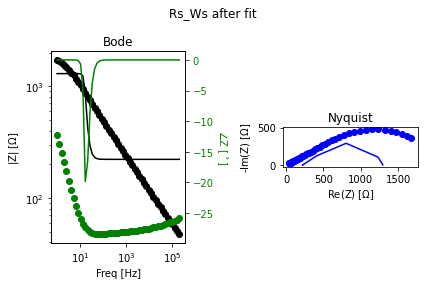

[('R1', 221.2407762555021), ('W1_R', 1074.1446830399846), ('W1_T', 0.06758483983226345), ('W1_p', 27.422801902775035)]


In [5]:
# Try scoring model w/ slightly not good initial guesses
sample = eis_data.loc[eis_data.Circuit == "Rs_Ws"].iloc[0,:]
frequencies = sample.freq
impedances = sample.Z
params = "R1:50,W1_R:50,W1_T:0.5,W1_p:4"
circuit = ECM_from_raw_strings(sample.Circuit, params)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " getting worse params")
print(f"getting worse circuit guess cv score: {circuit_CV_optimized_score(circuit, frequencies, impedances)}")
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])

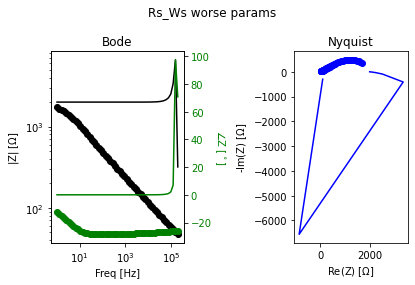

getting worse circuit guess cv score: 578.9773141886218


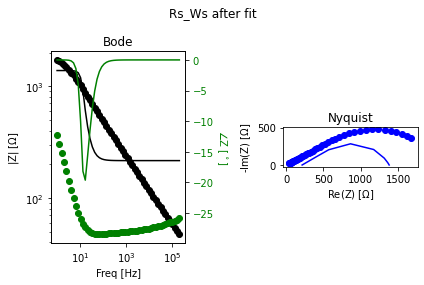

[('R1', 215.62435191309476), ('W1_R', 1164.9390536839173), ('W1_T', 0.09414886283148714), ('W1_p', 14.662003770793824)]


In [6]:
# Try scoring model w/ worse initial guesses
sample = eis_data.loc[eis_data.Circuit == "Rs_Ws"].iloc[0,:]
frequencies = sample.freq
impedances = sample.Z
params = "R1:1000,W1_R:1000,W1_T:0.00001,W1_p:6.5"
circuit = ECM_from_raw_strings(sample.Circuit, params)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " worse params")
print(f"getting worse circuit guess cv score: {circuit_CV_optimized_score(circuit, frequencies, impedances)}")
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])

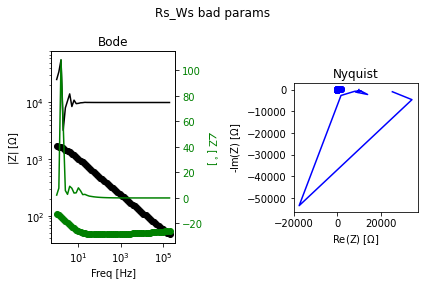

terrible circuit guess cv score: 616.479983469147


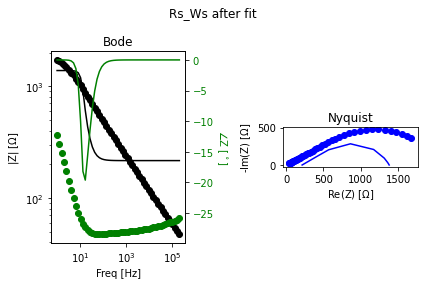

[('R1', 215.6633218022347), ('W1_R', 1165.0430471995503), ('W1_T', 0.0942113709463449), ('W1_p', 14.662171209788092)]


In [7]:
# Try scoring model w/ terrible initial guesses
sample = eis_data.loc[eis_data.Circuit == "Rs_Ws"].iloc[0,:]
bad_params = "R1:10000,W1_R:10000,W1_T:1,W1_p:6.5"
circuit = ECM_from_raw_strings(sample.Circuit, bad_params)
plot_eis(sample.freq, sample.Z, ECM=circuit, title=sample.Circuit + " bad params")
print(f"terrible circuit guess cv score: {circuit_CV_optimized_score(circuit, sample.freq, sample.Z)}")

circuit = ECM_from_raw_strings(sample.Circuit, bad_params)
circuit.fit(sample.freq, sample.Z)
plot_eis(sample.freq, sample.Z, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])